In [7]:
import pandas as pd
import os

# Base relative path
base_path = "../../results/pipeline results/5884paras_598qna/copies/"

# File paths
simple_rag_path = os.path.join(base_path, "simple_rag_qna_results_GPU_version - Copy.csv")
lqr_path = os.path.join(base_path, "LQR_processed_results - Copy.csv")
mod_lqr_path = os.path.join(base_path, "modLQR_processed_results - Copy.csv")

# Read CSVs
simple_rag_df = pd.read_csv(simple_rag_path)
lqr_df = pd.read_csv(lqr_path)
mod_lqr_df = pd.read_csv(mod_lqr_path)

# Rename for consistency
simple_rag_df = simple_rag_df.rename(columns={
    "retriever_time": "retrieval_time",
    "generator_time": "generation_time"
})

# ⚠️ Ignore the first 98 rows
simple_rag_df = simple_rag_df.iloc[98:]
lqr_df = lqr_df.iloc[98:]
mod_lqr_df = mod_lqr_df.iloc[98:]

# Calculate average times
simple_rag_avg = simple_rag_df[["retrieval_time", "generation_time", "total_time"]].mean()

lqr_avg = lqr_df[[
    "classification_time",
    "decomposition_time",
    "retrieval_time",
    "generation_time",
    "total_time",
    "total_time_without_classification"
]].mean()

mod_lqr_avg = mod_lqr_df[[
    "classification_time",
    "decomposition_time",
    "retrieval_time",
    "generation_time",
    "total_time",
    "total_time_without_classification"
]].mean()

# Create summary DataFrame
summary_df = pd.DataFrame({
    "Simple RAG": simple_rag_avg,
    "LR-RAG": lqr_avg,
    "DQ-RAG": mod_lqr_avg
})

# Format for display
summary_df = summary_df.rename_axis("Metric").reset_index()
summary_df[['Simple RAG', 'LR-RAG', 'DQ-RAG']] = summary_df[['Simple RAG', 'LR-RAG', 'DQ-RAG']].round(3)

# Display summary
print("\n📊 Time Metric Summary (Records 99–End):")
print(summary_df)



📊 Time Metric Summary (Records 99–End):
                              Metric  Simple RAG  LR-RAG  DQ-RAG
0                classification_time         NaN   3.488   5.776
1                 decomposition_time         NaN   5.460   7.224
2                    generation_time       6.875   2.061   5.333
3                     retrieval_time       0.056   5.210   8.848
4                         total_time       6.931  16.219  27.180
5  total_time_without_classification         NaN  12.731  21.405


In [8]:
summary_df

,Metric,Simple RAG,LR-RAG,DQ-RAG
0,classification_time,NaN,3.488,5.776
1,decomposition_time,NaN,5.460,7.224
2,generation_time,6.875,2.061,5.333
3,retrieval_time,0.056,5.210,8.848
4,total_time,6.931,16.219,27.180
5,total_time_without_classification,NaN,12.731,21.405


In [9]:
summary_df.to_csv("../../results/scores_results/times/summarize_time_res.csv")

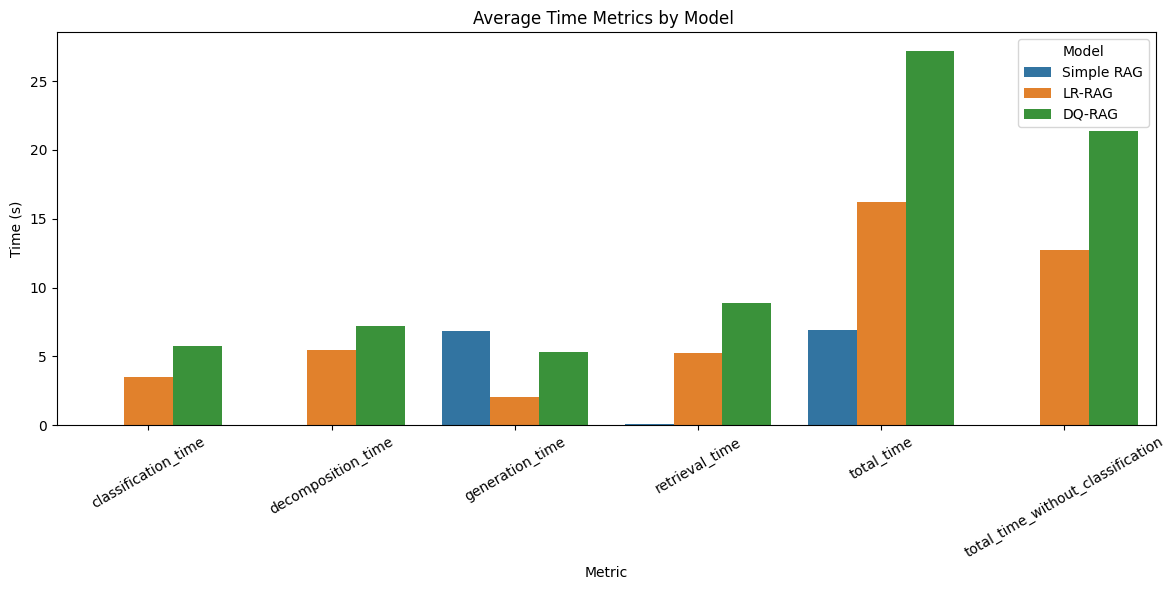

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_grouped_bar(summary_df):
    melted = summary_df.melt(id_vars='Metric', var_name='Model', value_name='Time (s)')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=melted, x='Metric', y='Time (s)', hue='Model')
    plt.title('Average Time Metrics by Model ')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

plot_grouped_bar(summary_df)


C:\Users\hamma\AppData\Local\Temp\ipykernel_24836\1554654498.py:23: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\Academic Work\Multihop_Project\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


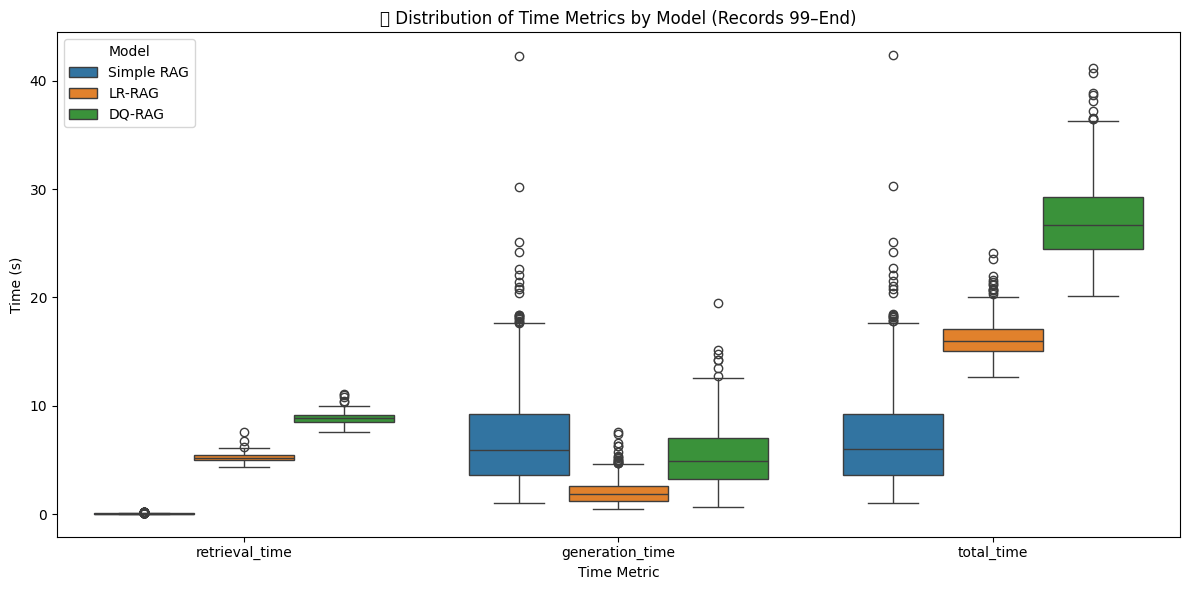

In [12]:
def prepare_time_data_for_boxplot(simple_rag_df, lqr_df, mod_lqr_df):
    # Add model labels
    simple_rag_df = simple_rag_df.assign(Model="Simple RAG")
    lqr_df = lqr_df.assign(Model="LR-RAG")
    mod_lqr_df = mod_lqr_df.assign(Model="DQ-RAG")

    # Combine relevant time metrics
    combined = pd.concat([
        simple_rag_df[['retrieval_time', 'generation_time', 'total_time', 'Model']],
        lqr_df[['retrieval_time', 'generation_time', 'total_time', 'Model']],
        mod_lqr_df[['retrieval_time', 'generation_time', 'total_time', 'Model']]
    ])

    # Melt for seaborn
    return combined.melt(id_vars='Model', var_name='Time Metric', value_name='Time (s)')

def plot_boxplot_times(simple_rag_df, lqr_df, mod_lqr_df):
    melted = prepare_time_data_for_boxplot(simple_rag_df, lqr_df, mod_lqr_df)
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=melted, x='Time Metric', y='Time (s)', hue='Model')
    plt.title('📦 Distribution of Time Metrics by Model (Records 99–End)')
    plt.tight_layout()
    plt.show()

plot_boxplot_times(simple_rag_df, lqr_df, mod_lqr_df)


C:\Users\hamma\AppData\Local\Temp\ipykernel_24836\416916131.py:10: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\Academic Work\Multihop_Project\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


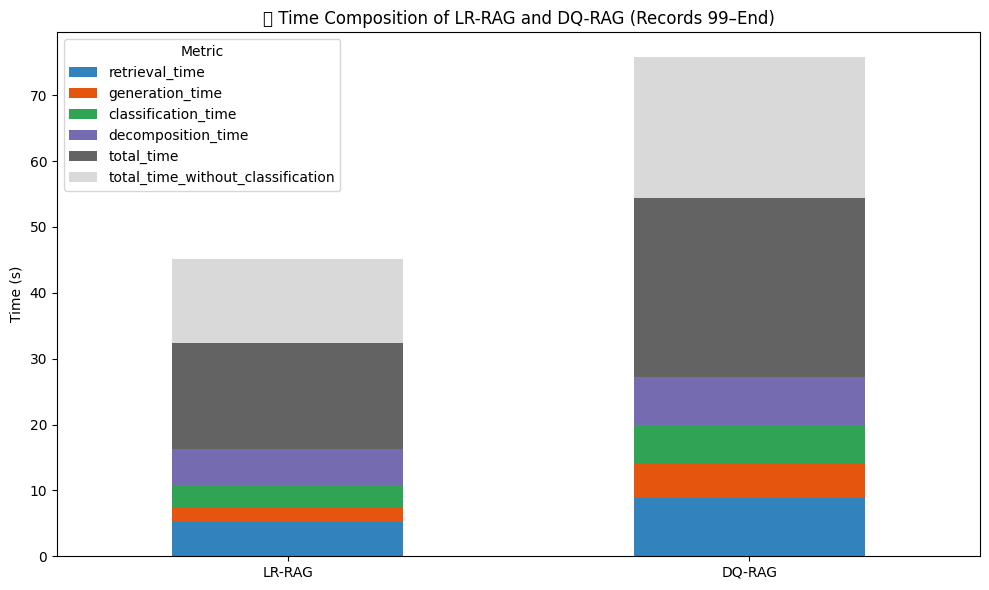

In [14]:
def plot_stacked_bar(summary_df):
    subset = summary_df.set_index('Metric').T
    subset = subset[['retrieval_time', 'generation_time', 'classification_time', 'decomposition_time', 'total_time','total_time_without_classification']]
    subset = subset.drop('Simple RAG')  # it doesn't have all components
    
    subset.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
    plt.ylabel("Time (s)")
    plt.title("🧱 Time Composition of LR-RAG and DQ-RAG (Records 99–End)")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_stacked_bar(summary_df)


C:\Users\hamma\AppData\Local\Temp\ipykernel_24836\147976204.py:6: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\Academic Work\Multihop_Project\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


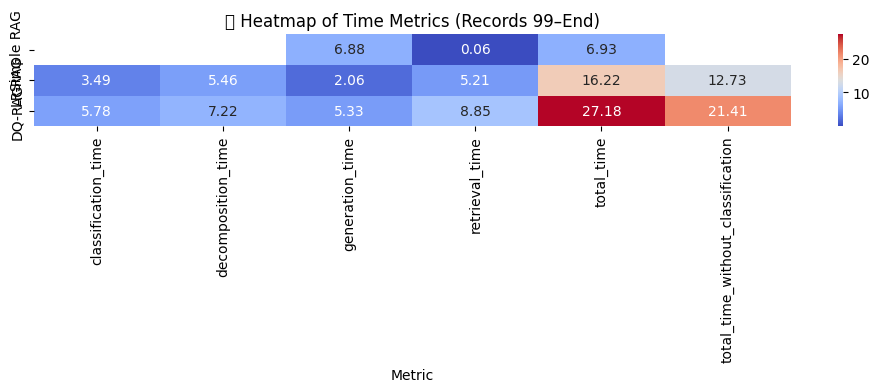

In [15]:
def plot_heatmap(summary_df):
    heatmap_df = summary_df.set_index('Metric').T
    plt.figure(figsize=(10, 4))
    sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('🔥 Heatmap of Time Metrics (Records 99–End)')
    plt.tight_layout()
    plt.show()

plot_heatmap(summary_df)
